

---



---


# Stefano Talamona 822452 - Assignment 3 Advanced Machine Learning


---



---



## Setup

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, initializers
from matplotlib import pyplot as plt

In [ ]:
n_classes = 10
input_shape = (28, 28, 1)
# Load data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Data loaded")

Data loaded


In [ ]:
# Scale from [0, 255] to [0, 1]
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
# Rescale to 28x28
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("Shape of x_train:", x_train.shape) 

Shape of x_train: (60000, 28, 28, 1)


In [ ]:
# Convert class vectors to binary calss matrices
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)
print("Shape of the labels vector:", y_train.shape)
print("Labels are one-hot encoded, like this:", y_train[0])

Shape of the labels vector: (60000, 10)
Labels are one-hot encoded, like this: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Building the network

## General structure:
The structure of the network is the same of the one used during the lab activity, with the difference that the number of units for each hidden layer is reduced by a factor of ***4*** in order to satisfy the hard constraint on the number of parameters.

## Weight initialization:
The weight initializer used is the ***He Uniform***, since unlike the ***Glorot*** initializer, it'is the recommended initializer when using ***ReLU*** as activation function ([as said here](https://towardsdatascience.com/hyper-parameters-in-action-part-ii-weight-initializers-35aee1a28404#:~:text=He%20initialization%20is%20the%20recommended%20one%20if%20the%20activation%20function%20is%20a%20ReLU.)).

## Batch size and number of epochs:
I *decreased the batch size* since the model is now smaller and faster. For the same reason I *doubled the number of epochs*, which could even be higher but ***10*** seemed fine given the results obtained on the test set and the convergence of loss and accuracy shown in the plots in the following section.

## Dropout:
In order to increase the accuracy I decided to *decrease the dropout probability* from ***0.5*** to ***0.1***. This gave better results in accuracy and was sufficient to prevent overfitting.  

## Expectations on the final results:
By heavily decreasing the number of learnable parameters I expect the model to perform a bit worse in terms of accuracy and loss value, meaning that the model will show lower accuracy and higher loss.

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape = input_shape),
     layers.Conv2D(8, kernel_size = (3, 3), activation = "relu", kernel_initializer = initializers.HeUniform(seed = 1234)),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Conv2D(16, kernel_size = (3, 3), activation = "relu", kernel_initializer = initializers.HeUniform(seed = 1234)),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Flatten(),
     layers.Dropout(0.1),
     layers.Dense(n_classes, activation = "softmax")
    ]
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dropout_3 (Dropout)         (None, 400)              

In the summary above you can see the number of parameters for each layer and the total ammount of parameters of the model.

## Training and testing

In [ ]:
batch_size = 64
epochs = 10
# Train the model
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
network_history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/10
844/844 [==============================] - 5s 6ms/step - loss: 0.3627 - accuracy: 0.8907 - val_loss: 0.0997 - val_accuracy: 0.9715
Epoch 2/10
844/844 [==============================] - 5s 5ms/step - loss: 0.1198 - accuracy: 0.9638 - val_loss: 0.0707 - val_accuracy: 0.9792
Epoch 3/10
844/844 [==============================] - 5s 5ms/step - loss: 0.0924 - accuracy: 0.9716 - val_loss: 0.0594 - val_accuracy: 0.9835
Epoch 4/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0780 - accuracy: 0.9758 - val_loss: 0.0540 - val_accuracy: 0.9848
Epoch 5/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0688 - accuracy: 0.9783 - val_loss: 0.0499 - val_accuracy: 0.9867
Epoch 6/10
844/844 [==============================] - 5s 5ms/step - loss: 0.0632 - accuracy: 0.9806 - val_loss: 0.0488 - val_accuracy: 0.9865
Epoch 7/10
844/844 [==============================] - 5s 5ms/step - loss: 0.0579 - accuracy: 0.9821 - val_loss: 0.0477 - val_accuracy: 0.9867
Epoch 

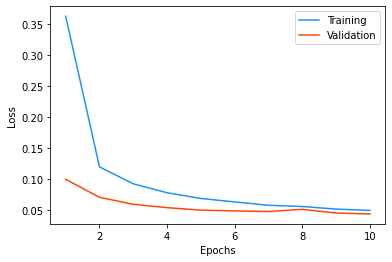

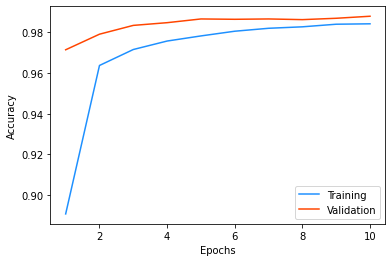

In [ ]:
# Plot results
x_plot = list(range(1, epochs + 1))
# Loss
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(x_plot, network_history.history['loss'], color = "dodgerblue")
plt.plot(x_plot, network_history.history['val_loss'], color = "orangered")
plt.legend(['Training', 'Validation'])
# Accuracy
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(x_plot, network_history.history['accuracy'], color = "dodgerblue")
plt.plot(x_plot, network_history.history['val_accuracy'], color = "orangered")
plt.legend(['Training', 'Validation'], loc = 4)
plt.show()

The plots show a nice correlation between the trends of accuracy and loss for training and validation, but we can see how the model actually performs a bit better on the validation set rather than the training set, so it appears to be slightly underfitting. This makes sense since we are using a small ammount of parameters.

In [ ]:
# Evaluation on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Test loss: 0.03380265831947327
Test accuracy: 0.9894999861717224




---


# Summary of the changes made to the original model and results obtained

## Original model used during the lab:
Number of parameters = ***34,826***

Batch size = ***128***

Weight initializer = ***Glorot Uniform*** (Keras default)

Dropout probability = ***0.5***

Original structure: 

     keras.Input(shape = input_shape),
     layers.Conv2D(32, kernel_size = (3, 3), activation = "relu"),      <===
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Conv2D(64, kernel_size = (3, 3), activation = "relu"),      <===
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Flatten(),
     layers.Dropout(0.5),                                               <===
     layers.Dense(n_classes, activation = "softmax")

Test loss: ***0.024869529530405998***

Test accuracy: ***0.9922000169754028***

(these last two results have been recorded during the lab avctivity using 10 epochs instead of 5)

## Modified model  with the hard constraint of a maximum of 6K learnable parameters:

Number of parameters = ***5,258***

Batch size = ***64***

Weight initializer = ***He Uniform***

Dropout probability = ***0.1***

Modified structure:

     keras.Input(shape = input_shape),
     layers.Conv2D(8, kernel_size = (3, 3), activation = "relu", kernel_initializer = initializers.HeUniform(seed = 1234)),    <===
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Conv2D(16, kernel_size = (3, 3), activation = "relu", kernel_initializer = initializers.HeUniform(seed = 1234)),   <===
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Flatten(),
     layers.Dropout(0.1),                                                                                                      <===
     layers.Dense(n_classes, activation = "softmax")

Test loss: ***0.03380265831947327***

Test accuracy: ***0.9894999861717224***



---

# Conclusions

The accuracy of the model on the test set decreased by almost ***0.27%***, which does not seem like a huge loss in performance, especially considering that *the modified model now has almost **7** times less learnable parameters* compared to the original one. 
Another difference in performance can be seen looking at the value of the loss, which is now almost ***40%*** more than the one reached by the original model.

These results follow the initial expectations mentioned in the "*Building the network*" section.